# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
FRACTURE = 'DATASET/TRAIN/FRACTURE'
NOT_FRACTURE = 'DATASET/TRAIN/NOT_FRACTURE'


In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR FRACTURE:

======== Images in:  DATASET/TRAIN/FRACTURE
Images_count :	 2078
Min_width :	 224
Max_width :	 4232
Min_height :	 224
Max_height :	 2426



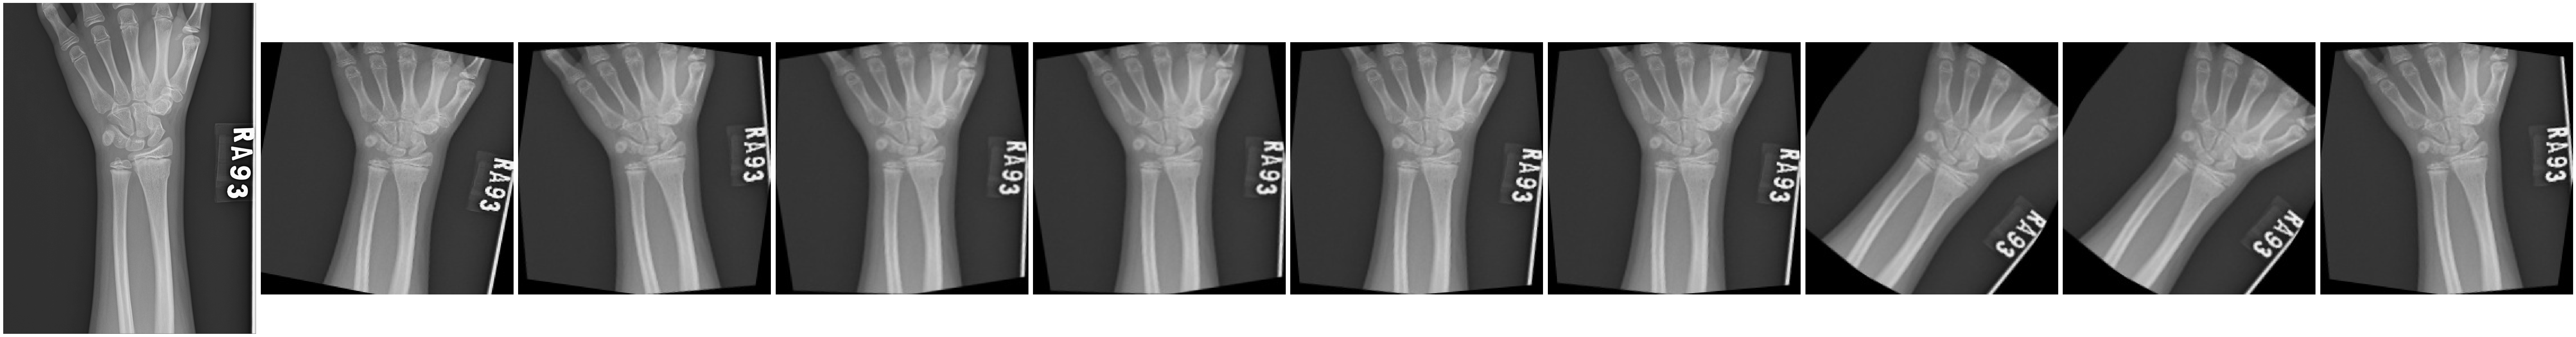

In [5]:
print("")
print("TRAINING DATA FOR FRACTURE:")
print("")
images_details(FRACTURE)
print("")
plot_images(FRACTURE, 10) 


TRAINING DATA FOR NOT_FRACTURE:

======== Images in:  DATASET/TRAIN/NOT_FRACTURE
Images_count :	 2019
Min_width :	 224
Max_width :	 1996
Min_height :	 224
Max_height :	 3764



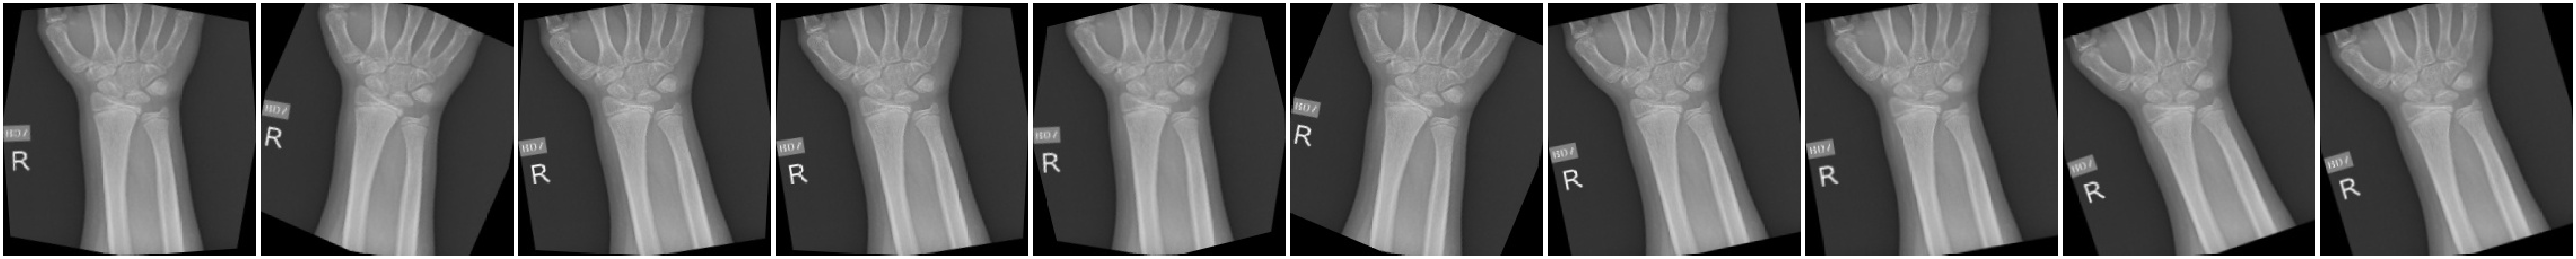

In [6]:
print("")
print("TRAINING DATA FOR NOT_FRACTURE:")
print("")
images_details(NOT_FRACTURE)
print("")
plot_images(NOT_FRACTURE, 10)

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 4097 images belonging to 2 classes.


In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 3840 images belonging to 2 classes.


In [9]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(32,(6,6),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(7,7)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [11]:
epochs = 35
batch_size = 224

In [12]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/35
18/18 [==============================] - ETA: 0s - loss: 0.8127 - accuracy: 0.5208
Epoch 1: accuracy improved from -inf to 0.52083, saving model to MANUAL.h5
18/18 [==============================] - 90s 5s/step - loss: 0.8127 - accuracy: 0.5208 - val_loss: 0.6922 - val_accuracy: 0.4982
Epoch 2/35
18/18 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.5578
Epoch 2: accuracy improved from 0.52083 to 0.55780, saving model to MANUAL.h5
18/18 [==============================] - 80s 4s/step - loss: 0.6767 - accuracy: 0.5578 - val_loss: 0.6559 - val_accuracy: 0.6158
Epoch 3/35
18/18 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.5677
Epoch 3: accuracy improved from 0.55780 to 0.56771, saving model to MANUAL.h5
18/18 [==============================] - 80s 4s/step - loss: 0.6786 - accuracy: 0.5677 - val_loss: 0.6441 - val_accuracy: 0.6544
Epoch 4/35
18/18 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.5729
Epoch 

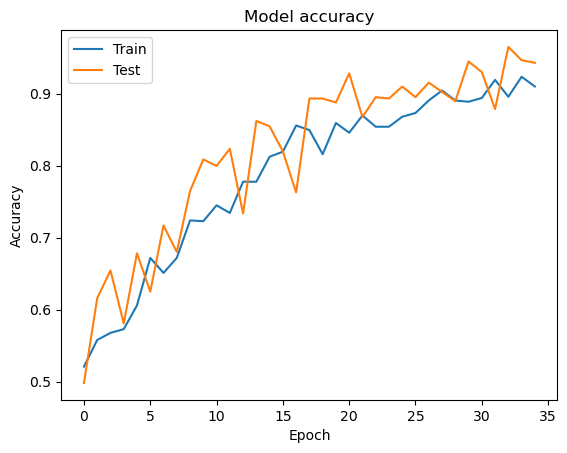

In [13]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

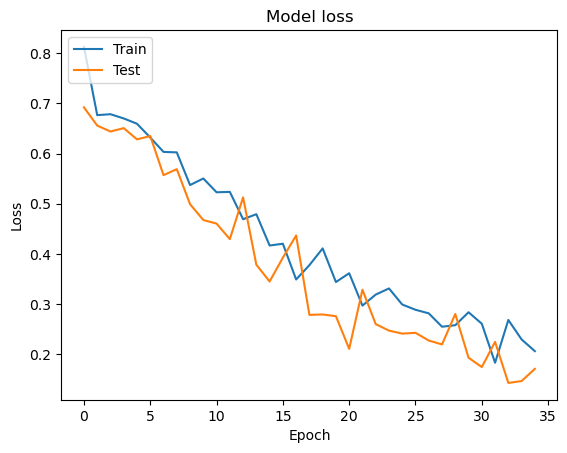

In [14]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()